In [55]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

np.random.seed(3)

train_data_generator = ImageDataGenerator(rescale=1./255)
train_generator = train_data_generator.flow_from_directory(
    directory='./handwriting_shape_plus/train',
    target_size=(24,24),
    batch_size=6,
    class_mode='categorical'
)

test_data_generator = ImageDataGenerator(rescale=1./255)
test_generator = test_data_generator.flow_from_directory(
    directory='./handwriting_shape_plus/test',
    target_size=(24,24),
    batch_size=6,
    class_mode='categorical'
)

Found 90 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


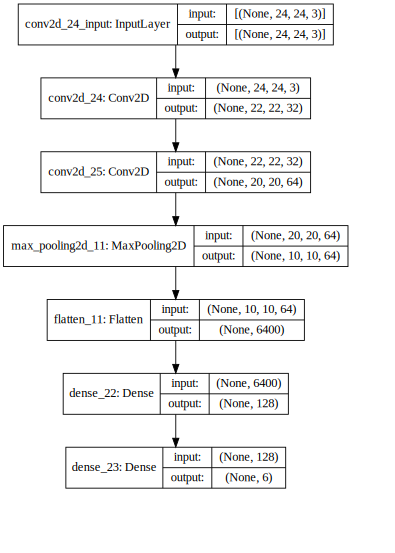

In [83]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

model = Sequential()
model.add(
    Conv2D(32,kernel_size=(3, 3),
           activation='relu',input_shape=(24,24,3))
)
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))

# 모델 가시화
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True, dpi=64).create(prog='dot', format='svg'))

In [84]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit_generator(
    train_generator,
    steps_per_epoch=15,
    epochs=100,
    validation_data=test_generator,
    validation_steps=5,
)

/Users/hwookim/docs/Univ/2021-1/AI/keras-practice/venv/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
15/15 [==============================] - 2s 69ms/step - loss: 1.8719 - accuracy: 0.1803 - val_loss: 1.0915 - val_accuracy: 0.8000
Epoch 2/100
15/15 [==============================] - 0s 31ms/step - loss: 0.6904 - accuracy: 0.8639 - val_loss: 0.3480 - val_accuracy: 0.8667
Epoch 3/100
15/15 [==============================] - 0s 14ms/step - loss

In [80]:
print("-- Evaluate --")
scores = model.evaluate(test_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
5/5 [==============================] - 0s 8ms/step - loss: 0.8813 - accuracy: 0.9333
accuracy: 93.33%


In [85]:
print("-- Predict --")
output = model.predict_generator(test_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(output)

print(test_generator.filenames)

-- Predict --
{'circle': 0, 'question': 1, 'rectangle': 2, 'triangle': 3, 'v': 4, 'x': 5}
[[0.000 0.000 1.000 0.000 0.000 0.000]
 [1.000 0.000 0.000 0.000 0.000 0.000]
 [1.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 1.000]
 [0.000 0.000 0.000 1.000 0.000 0.000]
 [0.000 1.000 0.000 0.000 0.000 0.000]
 [0.999 0.000 0.000 0.001 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.001 0.999]
 [0.000 0.929 0.000 0.000 0.000 0.071]
 [0.000 0.000 0.000 0.000 1.000 0.000]
 [0.000 0.000 1.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 1.000 0.000]
 [0.003 0.000 0.980 0.017 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 1.000]
 [0.000 0.000 0.000 0.000 0.001 0.999]
 [0.000 0.985 0.000 0.000 0.000 0.015]
 [0.000 0.000 0.000 1.000 0.000 0.000]
 [0.000 0.000 0.003 0.993 0.000 0.004]
 [0.000 0.000 0.000 0.998 0.000 0.002]
 [0.000 1.000 0.000 0.000 0.000 0.000]
 [1.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 1.000 0.000 0.000 0.000]
 [0.020 0.003 0.086 0.699 0.000 0.193]
 [0.000 0.000

/Users/hwookim/docs/Univ/2021-1/AI/keras-practice/venv/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '
